In [96]:
#importing modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import datetime
import time
import os

In [97]:
#loading train dataset
df_full = pd.read_csv(r"D:\The_Scrapers\Palak_Paneer\train_datasets\train_clean_full.csv")
print(df_full.shape)
df_full.head()

(891, 20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,tot_fam,female,male,C,Q,S,pclass_1,pclass_2,pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,0,1,0,0,1


In [98]:
#making dummies for interaction effects
df_full['fem_1'] = 0
df_full.loc[(df_full['female']==1)&(df_full['pclass_1']==1), 'fem_1'] = 1

df_full['fem_2'] = 0
df_full.loc[(df_full['female']==1)&(df_full['pclass_2']==1), 'fem_2'] = 1

df_full['fem_3'] = 0
df_full.loc[(df_full['female']==1)&(df_full['pclass_3']==1), 'fem_3'] = 1

df_full['male_1'] = 0
df_full.loc[(df_full['male']==1)&(df_full['pclass_1']==1), 'male_1'] = 1

df_full['male_2'] = 0
df_full.loc[(df_full['male']==1)&(df_full['pclass_2']==1), 'male_2'] = 1

df_full['male_3'] = 0
df_full.loc[(df_full['male']==1)&(df_full['pclass_3']==1), 'male_3'] = 1

In [99]:
df_full.head()
print(df_full.shape)
df_full.head()

(891, 26)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,S,pclass_1,pclass_2,pclass_3,fem_1,fem_2,fem_3,male_1,male_2,male_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,1,0,0,0,0,0,1


In [100]:
#breaking down into X and y arrays, removing categorical vars: train
#removing sibsp and parch to remove collinearity
#male_1 male _2 and male_3 not required, female_1, is by default, can remove it
X = df_full.drop(['Survived','Name','Sex', 'male', "pclass_1", 'Ticket','Embarked','Pclass', 'SibSp', 'Parch','PassengerId',
                  'C', 'male_1', 'male_2', 'male_3', 'fem_1'], axis = 1)
X['Intercept'] = 1
y = pd.DataFrame(df_full['Survived'])
print(X.shape)
print(y.shape)
X.head()
#1 taki usse as intercept lele

(891, 11)
(891, 1)


,Age,Fare,tot_fam,female,Q,S,pclass_2,pclass_3,fem_2,fem_3,Intercept
0,22.0,7.2500,1,0,0,1,0,1,0,0,1
1,38.0,71.2833,1,1,0,0,0,0,0,0,1
2,26.0,7.9250,0,1,0,1,0,1,0,1,1
3,35.0,53.1000,1,1,0,1,0,0,0,0,1
4,35.0,8.0500,0,0,0,1,0,1,0,0,1


In [101]:
#train, dev split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1)
X_dev.head()


,Age,Fare,tot_fam,female,Q,S,pclass_2,pclass_3,fem_2,fem_3,Intercept
351,40.0,35.000,0,0,0,1,0,0,0,0,1
814,30.5,8.050,0,0,0,1,0,1,0,0,1
733,23.0,13.000,0,0,0,1,1,0,0,0,1
308,30.0,24.000,1,0,0,0,1,0,0,0,1
380,42.0,227.525,0,1,0,0,0,0,0,0,1


In [102]:

#X_dev=X_dev.reset_index()

#y_dev=y_dev.reset_index()

In [103]:
#implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())
#look for variables where p value is <0.05 for it to be significant

Optimization terminated successfully.
         Current function value: 0.423145
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.368     
Dependent Variable: Survived         AIC:              699.8776  
Date:               2021-06-06 17:10 BIC:              751.4221  
No. Observations:   801              Log-Likelihood:   -338.94   
Df Model:           10               LL-Null:          -536.38   
Df Residuals:       790              LLR p-value:      1.1548e-78
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age           -0.0508    0.0095  -5.3311  0.0000  -0.0695  -0.0321
Fare           0.0012    0.0025   0.4830  0.6291  -0.0037   0.

In [55]:
#logreg = LogisticRegression(penalty='none')
#logistic=logreg.fit(X_train, y_train)
#logistic.coef_
#what is the difference between these 2 methods?-different libraries
#these coefs are different ebcause of regularisation

array([[-5.05301287e-02,  1.58336714e-03, -1.72252515e-01,
         3.41970161e+00,  3.06821514e-01, -2.87669193e-01,
        -1.65681192e+00, -1.92513585e+00,  1.56395334e+00,
        -1.73195305e+00]])

In [104]:
#convert to array
#X_dev = X_dev.to_numpy()
#y_train
y_dev.dtypes

Survived    int64
dtype: object

In [ ]:
y_pred = log_reg.predict(X_dev)
prediction = list(map(round, y_pred))

In [106]:
#predicting and calculating accuracy
y_pred = logit_model.predict(X_dev)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_dev, y_dev)))

ValueError: shapes (801,11) and (90,11) not aligned: 11 (dim 1) != 90 (dim 0)

In [31]:
#convert to array
y_dev = y_dev['Survived'].to_numpy()
y_dev

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

[[55  4]
 [11 20]]


<AxesSubplot:>

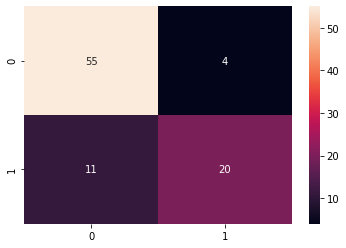

In [32]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_dev, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)

In [34]:
#calculating accuracy and other scores
accuracy_dev = metrics.accuracy_score(y_dev, y_pred)
print('accuracy is: '+ str(accuracy_dev))
precision_dev = metrics.precision_score(y_dev, y_pred)
print('precision is: '+ str(precision_dev))
sensitivity_dev = metrics.recall_score(y_dev, y_pred)
print(sensitivity_dev)
f1_score_dev = metrics.f1_score(y_dev, y_pred)
print(f1_score_dev)

accuracy is: 0.8333333333333334
precision is: 0.8333333333333334
0.6451612903225806
0.7272727272727272


In [35]:
#loading test dataset
X_test = pd.read_csv(r"D:\The_Scrapers\Palak_Paneer\test_datasets/test_clean_full.csv")
print(X_test.shape)
X_test.head()

(418, 19)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,tot_fam,female,male,C,Q,S,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,0,1,0,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,1,0,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,0,1,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,0,1,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,1,0,0,0,1,0,0,1


In [36]:
#making dummies for interaction effects
X_test['fem_1'] = 0
X_test.loc[(X_test['female']==1)&(X_test['pclass_1']==1), 'fem_1'] = 1

X_test['fem_2'] = 0
X_test.loc[(X_test['female']==1)&(X_test['pclass_2']==1), 'fem_2'] = 1

X_test['fem_3'] = 0
X_test.loc[(X_test['female']==1)&(X_test['pclass_3']==1), 'fem_3'] = 1

X_test['male_1'] = 0
X_test.loc[(X_test['male']==1)&(X_test['pclass_1']==1), 'male_1'] = 1

X_test['male_2'] = 0
X_test.loc[(X_test['male']==1)&(X_test['pclass_2']==1), 'male_2'] = 1

X_test['male_3'] = 0
X_test.loc[(X_test['male']==1)&(X_test['pclass_3']==1), 'male_3'] = 1

In [38]:
#breaking down into X and y arrays, removing categorical vars - these vars(except Name) have already been made into booleans: train
X_test = X_test.drop(['Name','Sex', 'male', "pclass_1", 'Ticket','Embarked','Pclass', 'SibSp', 'Parch','PassengerId',
                  'C', 'male_1', 'male_2', 'male_3', 'fem_1'], axis = 1)
print(X_test.shape)
print(X.shape)
#X.head()

(418, 10)
(891, 10)


In [39]:
#prediction y for dev data 
y_pred_test=logreg.predict(X_test)

In [40]:
#reading a submission csv and then using it's passenger id
pid_array = pd.read_csv(r'D:\The_Scrapers\Palak_Paneer\submission\csv_submission20210529230942.csv')
pid_array.shape
#pid_array.head()

(418, 2)

In [41]:
#subsetting only the Passenger Id column for final submission 
X_concat = pid_array[['PassengerId']]
X_concat.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [42]:
#creating final submission csv
y_pred_test_df = pd.DataFrame(y_pred_test)
y_pred_test_df.rename(columns = {0:'Survived'},inplace = True)
csv_submission = pd.merge(X_concat,y_pred_test_df, left_index=True, right_index=True)
print(csv_submission.shape)
csv_submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [43]:
#saving csv with a unique timestamp
timestamp = str(datetime.datetime.now().strftime('%Y%m%d%H%M%S'))
timestamp
csv_submission.to_csv(r'D:\The_Scrapers\Palak_Paneer\submission\csv_submission' + timestamp + '.csv', index =False)

In [ ]:
#improve accuracy, 0.76794 accuracy on test data 
#understand how to read the logistic table 
